### Questão 1 a)

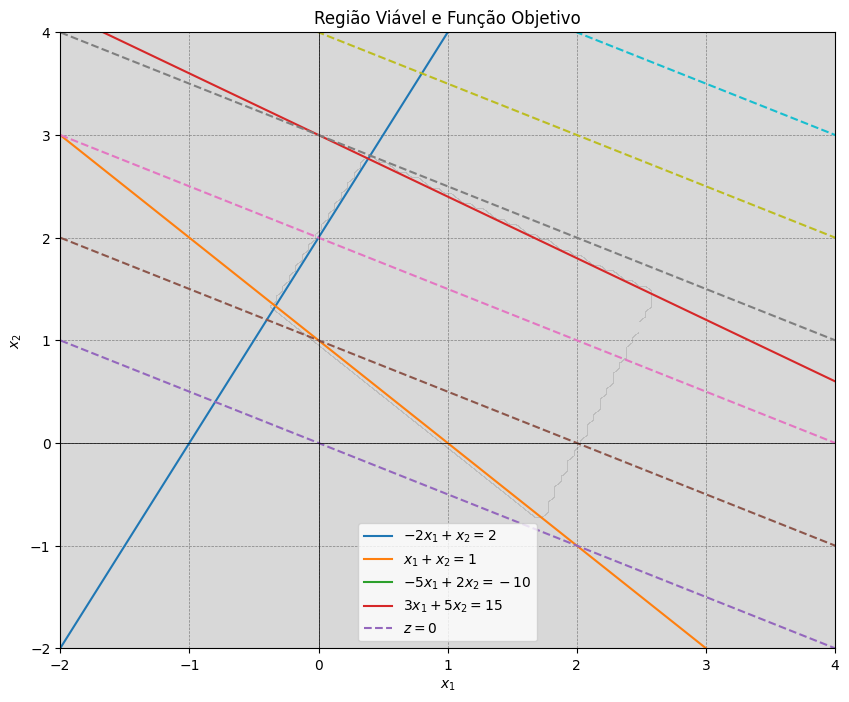

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Cria um grid de pontos (x1, x2)
x1 = np.linspace(-10, 10, 400)
x2 = np.linspace(-10, 10, 400)
X1, X2 = np.meshgrid(x1, x2)

# Funções para as restrições
def f1(x1):
    return 2 + 2*x1

def f2(x1):
    return 1 - x1

def f3(x1):
    return (x1 + 10) / 2

def f4(x1):
    return (15 - 3*x1) / 5

# Define as restrições
ineq1 = -2*X1 + X2 <= 2
ineq2 = X1 + X2 >= 1
ineq3 = -5*X1 + 2*X2 >= -10
ineq4 = 3*X1 + 5*X2 <= 15

# Região viável
viable_region = ineq1 & ineq2 & ineq3 & ineq4

# Plotagem
plt.figure(figsize=(10, 8))
plt.contourf(X1, X2, viable_region, levels=[-1, 0, 1], alpha=0.3, colors=['grey'])

# Plotagem das linhas das restrições
plt.plot(x1, f1(x1), label=r'$-2x_1 + x_2 = 2$')
plt.plot(x1, f2(x1), label=r'$x_1 + x_2 = 1$')
plt.plot(x1, f3(x1), label=r'$-5x_1 + 2x_2 = -10$')
plt.plot(x1, f4(x1), label=r'$3x_1 + 5x_2 = 15$')

# Limites do gráfico
plt.xlim(-2, 4)
plt.ylim(-2, 4)

# Adiciona a função objetivo
z_levels = [0, 2, 4, 6, 8, 10]
for z in z_levels:
    plt.plot(x1, (z - x1) / 2, linestyle='--', label=f'$z = {z}$' if z == 0 else None)

# Configurações finais do gráfico
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.title('Região Viável e Função Objetivo')
plt.show()


### Questão 1b)

#### (0,2) É a solução ótima, devido a maneira como está disposta a região viável

In [46]:
from mip import Model, xsum, BINARY, OptimizationStatus

# Cria o modelo
model = Model(sense='MAX', solver_name='CBC')

# Variáveis de decisão
x1 = model.add_var(name="x1")
x2 = model.add_var(name="x2")

# Função objetivo
model.objective = x1 + 2 * x2

# Restrições
model += -2 * x1 + x2 == 2
model += x1 + x2 >= 1
model += -5 * x1 + 2 * x2 >= -10
model += 3 * x1 + 5 * x2 <= 15

# Otimiza o modelo
status = model.optimize()

# Verifica o status e imprime a solução
if status == OptimizationStatus.OPTIMAL:
    print(f"Solucão ótima encontrada: x1 = {x1.x}, x2 = {x2.x}")
    print(f"Valor ótimo da função objetivo: {model.objective_value}")
elif status == OptimizationStatus.FEASIBLE:
    print(f"Solucão viável encontrada: x1 = {x1.x}, x2 = {x2.x} (não necessariamente ótima)")
    print(f"Valor da função objetivo: {model.objective_value}")
else:
    print("Não foi encontrada uma solução viável.")




Starting solution of the Linear programming problem using Primal Simplex

Coin0506I Presolve 0 (-4) rows, 0 (-2) columns and 0 (-8) elements
Clp0000I Optimal - objective value 5.9230769
Coin0511I After Postsolve, objective 5.9230769, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 5.923076923 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00
Solucão ótima encontrada: x1 = 0.3846153846153846, x2 = 2.769230769230769
Valor ótimo da função objetivo: 5.923076923076923


### Questão 2

In [82]:
import pandas as pd
tabela = [[1,2,2,3,1,0,20],[2,1,3,2,0,1,20],[-1,-2,-2,-3,-4,0,0]]
pd.DataFrame(tabela, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'b'])
# Tabela inicial do ppl

,x1,x2,x3,x4,x5,x6,b
0,1,2,2,3,1,0,20
1,2,1,3,2,0,1,20
2,-1,-2,-2,-3,-4,0,0


In [85]:
# Encontra o índice da coluna com o menor valor na linha 2
i_menor = tabela[2].index(min(tabela[2][:-1]))
print("i_menor:", tabela[2][i_menor])


i_menor: -4


In [93]:
# Encontra o índice da linha com o menor valor de b / a[i_menor]

b1 = tabela[0][-1] / tabela[0][i_menor-1]
b2 = tabela[1][-1] / tabela[1][i_menor-1]

print(tabela[0][-1],"",tabela[0][i_menor-1],"",b1)
print(tabela[1][-1],"",tabela[1][i_menor-1],"",b2)

# Escolher como pivô o menor valor de b / a[i_menor]
pivo = 1 if b1 < b2 else 2
print("Pivô:", pivo)




20  3  6.666666666666667
20  2  10.0
Pivô: 1


In [99]:
# Divide a linha do pivô pelo pivô
tabela[pivo] = [valor / tabela[pivo][i_menor-1] for valor in tabela[pivo]]


# Atualiza as outras linhas que não são a linha do pivô

for i, linha in enumerate(tabela):
    if i != pivo:
        mult = linha[i_menor-1]
        tabela[i] = [tabela[i][j] - mult * tabela[pivo][j] for j in range(len(linha))]

print("Tabela atualizada:")
pd.DataFrame(tabela, columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'b'])


Tabela atualizada:


,x1,x2,x3,x4,x5,x6,b
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
1,0.333333,0.666667,0.666667,1.0,0.333333,0.0,6.666667
2,0.000000,0.000000,0.000000,0.0,-3.000000,0.0,20.000000


### Questão 3

In [11]:
# import numpy as np

# def print_tableau(tableau, basic_vars):
#     print("\nTableau:")
#     print("Basic Vars:", basic_vars)
#     print(tableau)

# def two_phase_simplex(c, A, b):
#     # Número de variáveis e restrições
#     num_vars = len(c)
#     num_constraints = len(b)
    
#     # Adicionar variáveis artificiais
#     A_aux = np.hstack((A, np.eye(num_constraints)))
#     c_aux = np.hstack((np.zeros(num_vars), np.ones(num_constraints)))
    
#     # Formar o tableau inicial da Fase 1
#     tableau = np.hstack((A_aux, b.reshape(-1, 1)))
#     tableau = np.vstack((tableau, np.hstack((c_aux, [0]))))
    
#     # Variáveis básicas (variáveis artificiais inicialmente)
#     basic_vars = list(range(num_vars, num_vars + num_constraints))
    
#     # Fase 1
#     print("Fase 1")
#     tableau, basic_vars = simplex_phase(tableau, basic_vars, is_aux=True)
    
#     # Verificar se a solução da Fase 1 é viável (se a função objetivo auxiliar é zero)
#     if tableau[-1, -1] != 0:
#         raise ValueError("O problema original não tem solução viável.")
    
#     # Remover variáveis artificiais e preparar para a Fase 2
#     tableau = tableau[:-1, :num_vars + num_constraints + 1]
#     c_new = np.hstack((c, np.zeros(num_constraints)))
#     tableau = np.vstack((tableau, np.hstack((c_new, [0]))))
    
#     # Fase 2
#     print("Fase 2")
#     tableau, basic_vars = simplex_phase(tableau, basic_vars, is_aux=False)
    
#     # Obter a solução
#     solution = np.zeros(num_vars)
#     for i in range(num_constraints):
#         if basic_vars[i] < num_vars:
#             solution[basic_vars[i]] = tableau[i, -1]
    
#     optimal_value = tableau[-1, -1]
    
#     return solution, optimal_value

# def simplex_phase(tableau, basic_vars, is_aux):
#     num_rows, num_cols = tableau.shape
#     num_vars = num_cols - 1
    
#     while True:
#         print_tableau(tableau, basic_vars)
        
#         # Identificar a coluna pivô (variável que entra na base)
#         if is_aux:
#             col_pivot = np.argmin(tableau[-1, :-1])
#             if tableau[-1, col_pivot] >= 0:
#                 break  # Ótimo atingido
#         else:
#             col_pivot = np.argmax(tableau[-1, :-1])
#             if tableau[-1, col_pivot] <= 0:
#                 break  # Ótimo atingido
        
#         # Identificar a linha pivô (variável que sai da base)
#         ratios = tableau[:-1, -1] / tableau[:-1, col_pivot]
#         valid_ratios = ratios[ratios > 0]
#         if len(valid_ratios) == 0:
#             raise ValueError("O problema não tem solução ilimitada.")
#         row_pivot = np.where(ratios == valid_ratios.min())[0][0]
        
#         # Pivotar
#         tableau[row_pivot, :] /= tableau[row_pivot, col_pivot]
#         for i in range(num_rows):
#             if i != row_pivot:
#                 tableau[i, :] -= tableau[i, col_pivot] * tableau[row_pivot, :]
        
#         # Atualizar variáveis básicas
#         basic_vars[row_pivot] = col_pivot
    
#     return tableau, basic_vars

# # Dados do problema
# c = np.array([-3, -2, 5])
# A = np.array([
#     [3, 4, 3],
#     [-6, 20, -35]
# ])
# b = np.array([7, 17])

# # Resolver o problema
# solution, optimal_value = two_phase_simplex(c, A, b)

# print("\nSolução ótima:")
# print("x1 =", solution[0])
# print("x2 =", solution[1])
# print("x3 =", solution[2])
# print("Valor ótimo de Q(x) =", optimal_value)


Fase 1

Tableau:
Basic Vars: [3, 4]
[[  3.   4.   3.   1.   0.   7.]
 [ -6.  20. -35.   0.   1.  17.]
 [  0.   0.   0.   1.   1.   0.]]
Fase 2

Tableau:
Basic Vars: [3, 4]
[[  3.   4.   3.   1.   0.   7.]
 [ -6.  20. -35.   0.   1.  17.]
 [ -3.  -2.   5.   0.   0.   0.]]

Tableau:
Basic Vars: [np.int64(2), 4]
[[  1.           1.33333333   1.           0.33333333   0.
    2.33333333]
 [ 29.          66.66666667   0.          11.66666667   1.
   98.66666667]
 [ -8.          -8.66666667   0.          -1.66666667   0.
  -11.66666667]]

Solução ótima:
x1 = 0.0
x2 = 0.0
x3 = 2.3333333333333335
Valor ótimo de Q(x) = -11.666666666666668


### Questão 4 a)


#### Maximizar 𝑍=10𝑥1+8𝑥2+𝑥3


 

#### Sujeito a:

#### 𝑥1+𝑥2+𝑥3≤100
#### h1x1+h2x2+h3x3≤300
#### 𝑥1,𝑥2,𝑥3≥0


### Questão 4 b)

#### Maximizar 𝑍 = 10 𝑥 1 + 8 𝑥 2 + 𝑥 3 Z=10x 1 ​ +8x 2 ​ +x 3 
#### ​Sujeito a: 
#### x 1 ​ +x 2 ​ +x 3 ​ ≤100 
#### ℎ 1 𝑥 1 + ℎ 2 𝑥 2 + ℎ 3 𝑥 3 ≤ 10.000 
#### 𝑥 1 ≤ 50 
#### x 1 ​ ,x 2 ​ ,x 3 ​ ≥0

### Questão c)

#### Minimizar 𝑊 = 100𝑦1+10.000𝑦2

​
 

#### Sujeito a:

#### 𝑦1+ℎ1𝑦2≥10

#### 𝑦1+ℎ2𝑦2≥8
#### 𝑦1+ℎ3𝑦2≥1

#### 𝑦1,𝑦2≥0


#### Caso (a): A solução será drasticamente alterada, possivelmente reduzindo a quantidade de hectares plantados, pois a restrição de mão-de-obra é muito mais severa.
#### Caso (b): A solução será ajustada para refletir a nova restrição de máximo de 50 hectares para trigo, o que pode impactar a quantidade de soja e milho plantados.
#### Caso (c): As variáveis do dual fornecem informações sobre o valor marginal das restrições e serão usadas para interpretar o impacto das mudanças nas restrições sobre a solução ótima.

In [10]:
from mip import Model, xsum, MAXIMIZE, CONTINUOUS

# Definição dos parâmetros
h1 = 2
h2 = 2
h3 = 5

# Dados do problema
lucro_trigo = 10
lucro_soja = 8
lucro_milho = 1
area_total = 100
mao_de_obra_total = 10000

# Criação do modelo
model = Model(sense=MAXIMIZE)

# Variáveis de decisão
x1 = model.add_var(name="x1", var_type=CONTINUOUS, lb=0)  # Trigo
x2 = model.add_var(name="x2", var_type=CONTINUOUS, lb=0)  # Soja
x3 = model.add_var(name="x3", var_type=CONTINUOUS, lb=0)  # Milho

# Função objetivo
model.objective = xsum([lucro_trigo * x1, lucro_soja * x2, lucro_milho * x3])

# Restrições
model += x1 + x2 + x3 <= area_total
model += h1 * x1 + h2 * x2 + h3 * x3 <= mao_de_obra_total

# Resolver o modelo
model.optimize()

# Resultados
if model.num_solutions:
    print(f"Solução ótima encontrada:")
    print(f"Trigo (x1): {x1.x:.2f} hectares")
    print(f"Soja (x2): {x2.x:.2f} hectares")
    print(f"Milho (x3): {x3.x:.2f} hectares")
    print(f"Lucro total: {model.objective_value:.2f} unidades monetárias")
else:
    print("Nenhuma solução ótima encontrada")

# Caso (a) - Restrição de Mão-de-Obra a 300 horas
model_case_a = Model(sense=MAXIMIZE)
x1 = model_case_a.add_var(name="x1", var_type=CONTINUOUS, lb=0)
x2 = model_case_a.add_var(name="x2", var_type=CONTINUOUS, lb=0)
x3 = model_case_a.add_var(name="x3", var_type=CONTINUOUS, lb=0)
model_case_a.objective = xsum([lucro_trigo * x1, lucro_soja * x2, lucro_milho * x3])
model_case_a += x1 + x2 + x3 <= area_total
model_case_a += h1 * x1 + h2 * x2 + h3 * x3 <= 300  # Restrição de mão-de-obra alterada

model_case_a.optimize()

if model_case_a.num_solutions:
    print(f"\nSolução ótima para o caso (a):")
    print(f"Trigo (x1): {x1.x:.2f} hectares")
    print(f"Soja (x2): {x2.x:.2f} hectares")
    print(f"Milho (x3): {x3.x:.2f} hectares")
    print(f"Lucro total: {model_case_a.objective_value:.2f} unidades monetárias")
else:
    print("Nenhuma solução ótima encontrada para o caso (a)")

# Caso (b) - Restrição de Máximo de 50 Hectares para Trigo
model_case_b = Model(sense=MAXIMIZE)
x1 = model_case_b.add_var(name="x1", var_type=CONTINUOUS, lb=0)
x2 = model_case_b.add_var(name="x2", var_type=CONTINUOUS, lb=0)
x3 = model_case_b.add_var(name="x3", var_type=CONTINUOUS, lb=0)
model_case_b.objective = xsum([lucro_trigo * x1, lucro_soja * x2, lucro_milho * x3])
model_case_b += x1 + x2 + x3 <= area_total
model_case_b += h1 * x1 + h2 * x2 + h3 * x3 <= mao_de_obra_total
model_case_b += x1 <= 50  # Restrição adicional para trigo

model_case_b.optimize()

if model_case_b.num_solutions:
    print(f"\nSolução ótima para o caso (b):")
    print(f"Trigo (x1): {x1.x:.2f} hectares")
    print(f"Soja (x2): {x2.x:.2f} hectares")
    print(f"Milho (x3): {x3.x:.2f} hectares")
    print(f"Lucro total: {model_case_b.objective_value:.2f} unidades monetárias")
else:
    print("Nenhuma solução ótima encontrada para o caso (b)")


Starting solution of the Linear programming problem using Primal Simplex

Coin0506I Presolve 0 (-2) rows, 0 (-3) columns and 0 (-6) elements
Clp0000I Optimal - objective value 1000
Coin0511I After Postsolve, objective 1000, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 1000 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00
Solução ótima encontrada:
Trigo (x1): 100.00 hectares
Soja (x2): 0.00 hectares
Milho (x3): 0.00 hectares
Lucro total: 1000.00 unidades monetárias
Starting solution of the Linear programming problem using Primal Simplex

Coin0506I Presolve 2 (0) rows, 2 (-1) columns and 4 (-2) elements
Clp1000I sum of infeasibilities 0 - average 0, 1 fixed columns
Coin0506I Presolve 0 (-2) rows, 0 (-2) columns and 0 (-4) elements
Clp0000I Optimal - objective value 1000
Clp0000I Optimal - objective value 1000
Coin0511I After Postsolve, objective 1000, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj 1000
Clp0000I Optimal - objective value 1000
Clp00